# 1 Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl
from fastai.vision.all import *
from fastai.metrics import accuracy, error_rate
from fastai.vision.core import imagenet_stats, PILImage
from fastai.vision.data import ImageDataLoaders
from fastai.vision.augment import aug_transforms, Resize
from fastai.vision.learner import cnn_learner, vision_learner
from fastai.data.transforms import Normalize


import torchvision.models as models



# 1.1 Create the Dataset and Split it into Training and Validation Sets


# 2 Preprocess and Augment Training Data

In [10]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
directory = "D:\\University\\ArchitectureStyles\\archive-small\\arcDataset"
# train_dataset = image_dataset_from_directory(directory,
#                                              shuffle=True,
#                                              batch_size=BATCH_SIZE,
#                                              image_size=IMG_SIZE,
#                                              validation_split=0.2,
#                                              label_mode='categorical',
#                                              subset='training',
# 
#                                              seed=42)
# validation_dataset = image_dataset_from_directory(directory,
#                                              shuffle=True,
#                                              batch_size=BATCH_SIZE,
#                                              image_size=IMG_SIZE,
#                                              validation_split=0.2,
#                                              subset='validation',
#                                              label_mode='categorical',
#                                              seed=42)

In [11]:
# AUTOTUNE = tf.data.experimental.AUTOTUNE
# train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

Augumented images

# 3 Using MobileNetV2

In [12]:
preprocess_input = tf.keras.applications.куітуе50.preprocess_input

AttributeError: module 'keras.applications' has no attribute 'куітуе50'

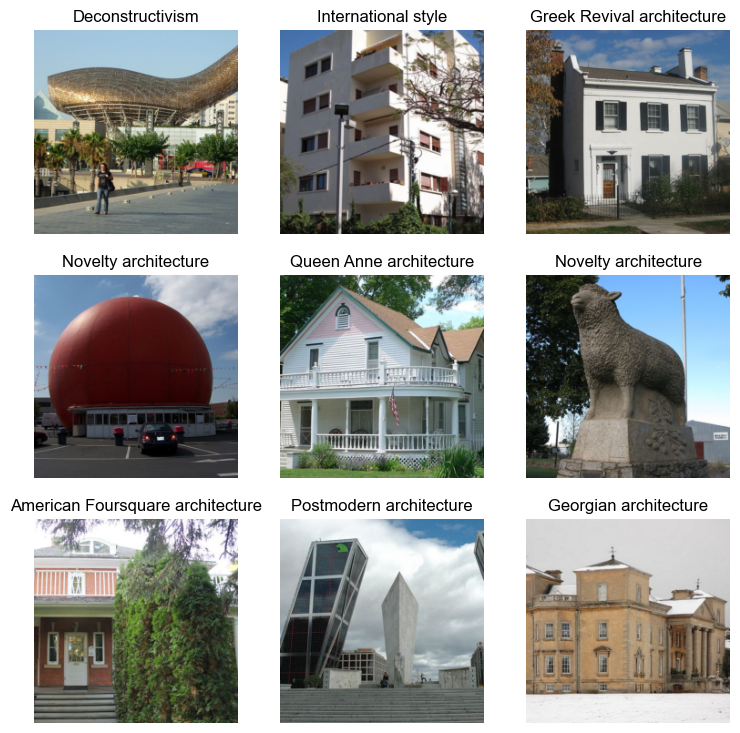

In [13]:
tfms = aug_transforms(do_flip=True, flip_vert=False, max_rotate=10, max_zoom=1.1,
                      max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, size=224)



data = ImageDataLoaders.from_folder(directory, train=".", valid_pct=0.2, item_tfms=Resize(224),
                                  size=224, num_workers=4, padding_mode='reflection', bs=64,  batch_tfms=Normalize.from_stats(*imagenet_stats))


data.show_batch()

In [14]:
learn = vision_learner(data, models.resnet50,metrics=[accuracy, error_rate])

In [15]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,3.315538,1.659653,0.518789,0.481211,13:50
1,2.001743,1.273514,0.630480,0.369520,12:17
2,1.364672,1.109885,0.670146,0.329854,12:15
3,0.963955,1.011803,0.712944,0.287056,12:15
4,0.742344,0.961248,0.727557,0.272443,12:16
5,0.616379,0.957378,0.722338,0.277662,12:13


Results

In [30]:
learn.recorder.plot()
learn.save('stage-1-mobilenet3')

AttributeError: 'Sequential' object has no attribute 'plot'

In [31]:
learn.unfreeze()

AttributeError: 'Sequential' object has no attribute 'plot'

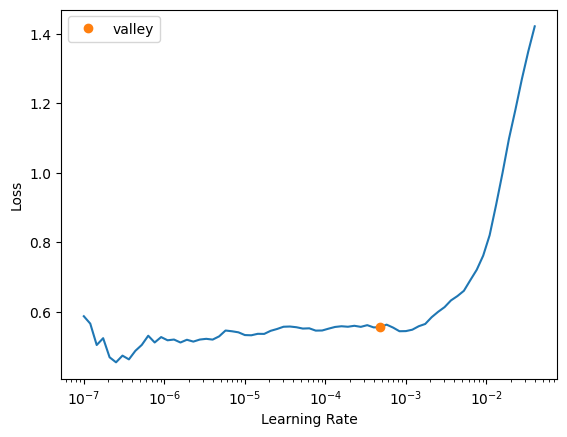

In [32]:
learn.lr_find()
learn.recorder.plot()

In [33]:
learn.fit_one_cycle(6, lr_max=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.565683,1.028821,0.702505,0.297495,14:37
1,0.504348,0.976219,0.721294,0.278706,14:39
2,0.434979,0.939014,0.727557,0.272443,14:38
3,0.370345,0.921995,0.742171,0.257829,14:42
4,0.320582,0.920204,0.737996,0.262004,14:34
5,0.302479,0.927185,0.739040,0.260960,14:31


In [35]:

learn.save('stage-2-mobilenet3')

Path('D:/University/ArchitectureStyles/archive-small/arcDataset/models/stage-2-mobilenet3.pth')